In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import prepare


Loan Prediction

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Project idea: The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. We can build a linear model for this project.

# Acquire

In [2]:
df1 = pd.read_csv('loan.csv')

In [3]:
df2 = pd.read_csv('loan2.csv')

In [4]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df2.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df1.shape

(614, 13)

In [9]:
df2.shape

(367, 12)

In [10]:
# merge the two dataframes
#df = df1.merge(df2, how='outer', on='Loan_ID')

In [11]:
df =pd.concat([df1,df2])

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


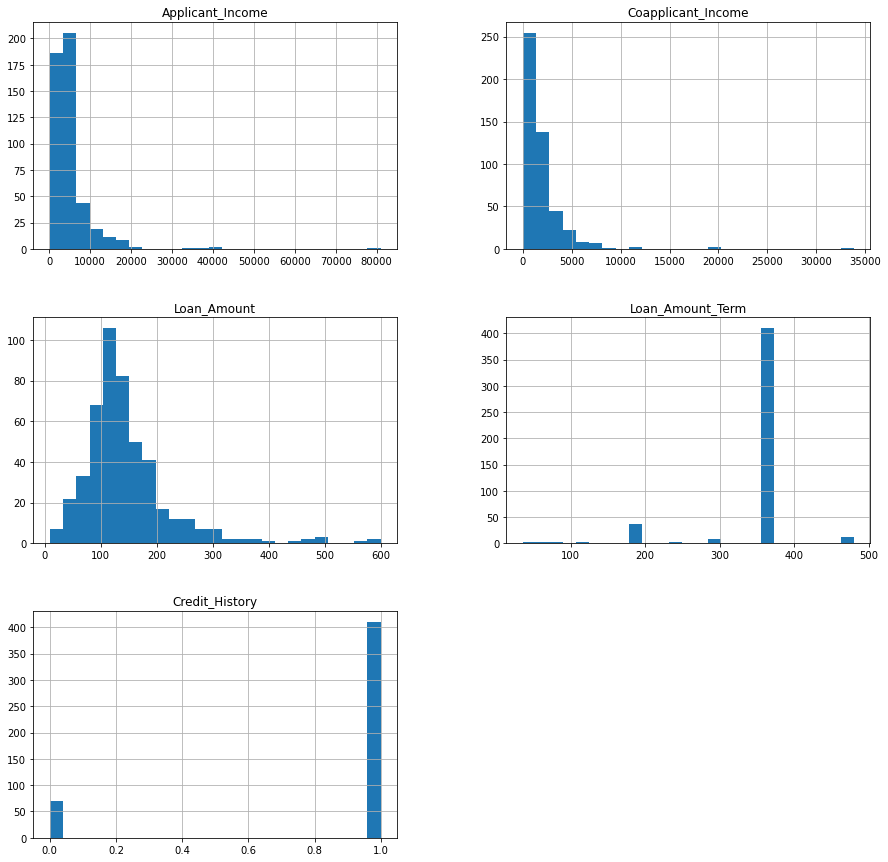

In [49]:
%matplotlib inline 


df.hist(bins=25, figsize=(15,15))
plt.show()

QUESTION: HOW DO I MAKE THE ABOVE HISTOGRAMS BIGGER

Takeaways
- I pulled in 2 csv's with 980 rows with each row representing an applicant
- The loan amount is equally distributed
- The applicantincome is right skewed

# Prepare

In [15]:
# rename column
df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [17]:
df.shape

(981, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             981 non-null    object 
 1   Gender              957 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    object 
 4   Education           981 non-null    object 
 5   Self_Employed       926 non-null    object 
 6   Applicant_Income    981 non-null    int64  
 7   Coapplicant_Income  981 non-null    float64
 8   Loan_Amount         954 non-null    float64
 9   Loan_Amount_Term    961 non-null    float64
 10  Credit_History      902 non-null    float64
 11  Property_Area       981 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [44]:
# check for nulls
df.isna().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount             0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status           289
dtype: int64

In [20]:
# drop nulls in all but loan status
df = df.dropna(subset=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

QUESTION: WHAT SHOULD I DO WITH THE NULLS IN THE TARGET COLUMN? DO I DROP ALL OF THOSE
ROWS? WHAT IF THAT ONLY LEAVES ME 480 ROWS TOTAL SHOULD I CONTINUE WITH THIS DATASET?

In [33]:
df.shape

(769, 13)

In [45]:
df = df.dropna()

In [46]:
df.shape

(480, 13)

In [27]:
# remove duplicates
df.drop_duplicates(keep=False,inplace=True)

In [28]:
df.shape
# so there are no duplicates

(769, 13)

In [52]:
train, validate, test = prepare.train_validate_test_split(df, target='Loan_Status')

In [53]:
train.shape

(268, 13)

In [54]:
validate.shape

(116, 13)

In [55]:
test.shape

(96, 13)

In [25]:
def prep_function():
    # rename column
    df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})
    # drop nulls in all but loan status
    df = df.dropna(subset=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

# Explore

5 questions to explore:
    1. How does applicant income effect outcome of loan approval
    2. Does gender effect loan approval
    3. How much does applicant income effect loan approval
    4. Does property area effect loan approval
    5. Does loan amount have a relationship wiht loan approval

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

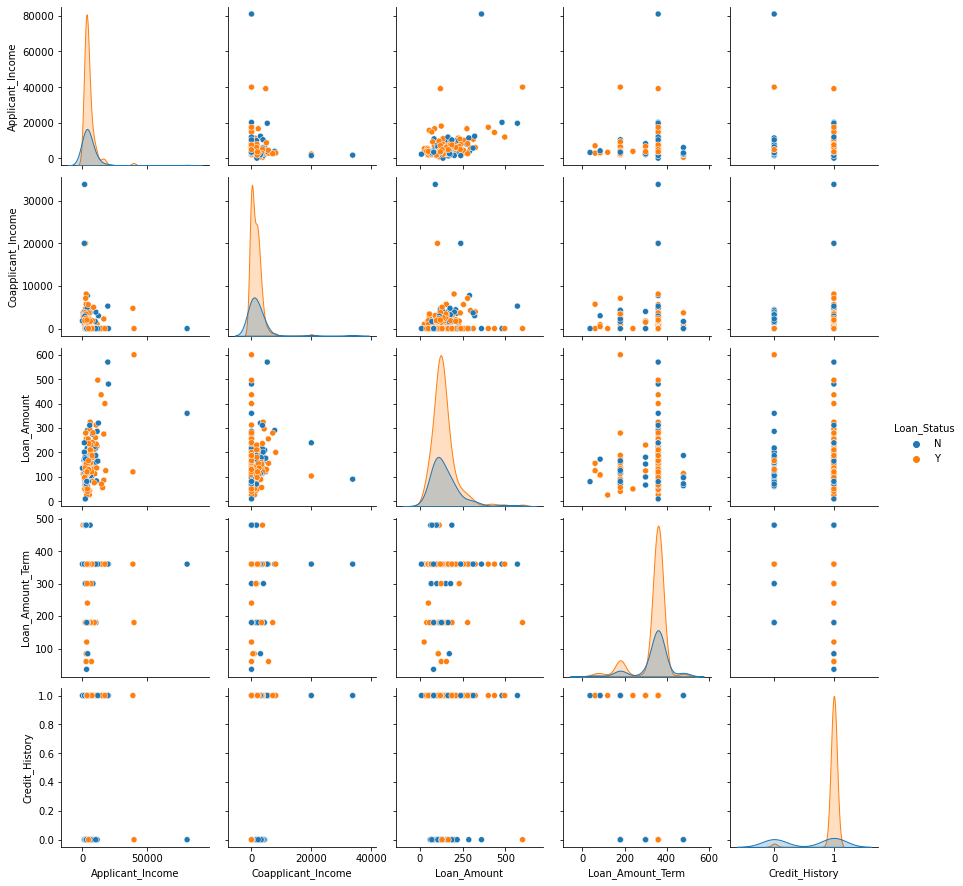

In [56]:
# Next I'll display some pairplots
sns.pairplot(train, hue='Loan_Status')
plt.show()

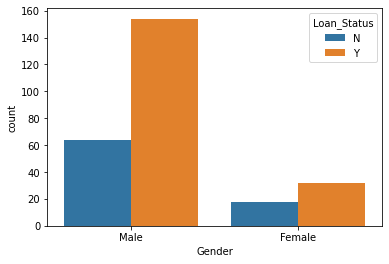

In [57]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, x='Gender', hue='Loan_Status')
plt.show()

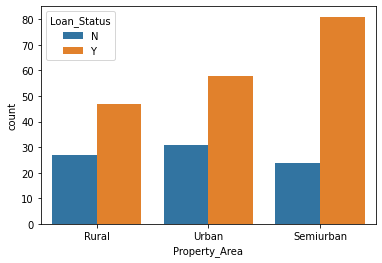

In [58]:
# plot payment_type by churnn in a countplot
sns.countplot(data=train, x='Property_Area', hue='Loan_Status')
plt.show()

In [60]:
# create a heatmap
v1 = sns.heatmap(df)

ValueError: could not convert string to float: 'LP001003'